In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({"font.weight":"medium", "font.style":"normal", "font.family":"Verdana", "font.size":18})

In [ ]:
dir_name = "../logfiles_consul_1st/csv/"
file_write_list = dir_name+"write-list-%s.csv"
file_list_secrets = dir_name+"list-secrets-%s.csv"
file_write_random_secrets = dir_name+"write-random-secrets-%s.csv"
file_write_secrets = dir_name+"write-secrets-%s.csv"
file_read_secrets = dir_name+"read-secrets-%s.csv"



start=2, end=20
start=2, end=20
start=2, end=20
start=2, end=20


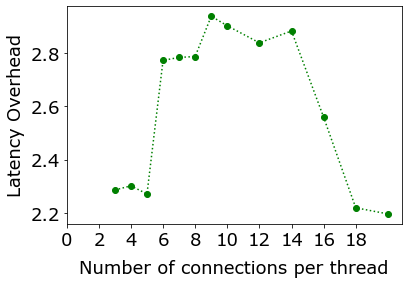

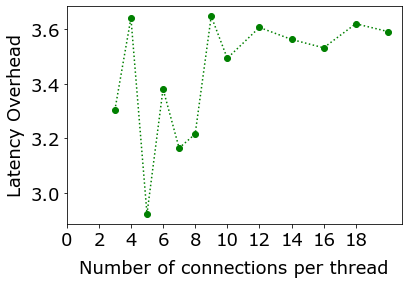

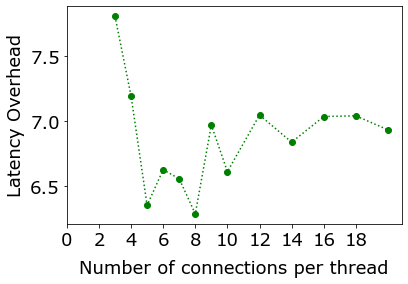

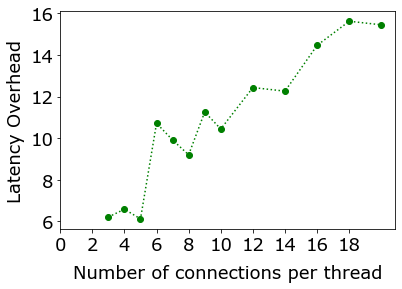

In [40]:
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
for i in range(len(run_type)): 
    df_list = pandas.read_csv(run_type[i]%"basic").astype(dtype=float)
    df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
    # print(df_list_tc_request)
    fig, ax = plt.subplots()
    # for key, grp in df_list_tc_request.groupby(['threads']):
    #     # print(grp)
    #     ax = grp.plot(ax=ax, kind='line', x='throughput', y='lat_avg', label=str(int(key))+" Thread")
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=3)
    # plt.ylabel('Latency Maximum(ms)', labelpad=5)
    # plt.xlabel('Throughput(Req/Sec)', labelpad=10)
    df_list1 = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
    df_list_tc_request1 = df_list1.groupby(['threads', 'connections'],as_index=False).mean()
    df = pandas.merge(df_list_tc_request, df_list_tc_request1 ,  how='left', left_on=['threads','connections'], right_on = ['threads','connections'])
    # df['overhead'] = df.apply(lambda row: df['lat_avg_x']/df['lat_avg_y'], axis=1)
    
    fn = lambda row: row.lat_avg_y / row.lat_avg_x # define a function for the new column
    col = df.apply(fn, axis=1) # get column data with an index
    df = df.assign(overhead=col.values) # assign values to column 'c'
    # df.to_csv(run_type[i] % "scone1")

    for key, grp in df.groupby(['threads']):
        if int(key) != 3:
            continue
        ax = grp.plot(ax=ax, kind='line', x='connections', y='overhead', linestyle=':', marker='o', color="green")
        ax.get_legend().remove()
        
    # plt.legend(loc='lower right', bbox_to_anchor=[1.5, 0.5],
    #         ncol=1)
    # plt.figtext(.5, -.1, graph_labels[i], ha='center')
    # plt.xticks(x)
    
    plt.ylabel('Latency Overhead', labelpad=5)
    plt.xlabel('Number of connections per thread', labelpad=10)
    # plottext = graph_labels[i]
    # if i == 0 :
    #     plottext = graph_labels[i] + "(Batch of 100)"
    # plt.figtext(.5, -.12, plottext, ha='center')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(0, int(end), 2))
    print("start=%d, end=%d" %(start,end))
    plt.savefig("images/Overhead_" + graph_labels[i], bbox_inches='tight')
        

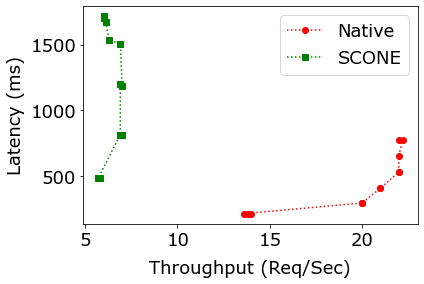

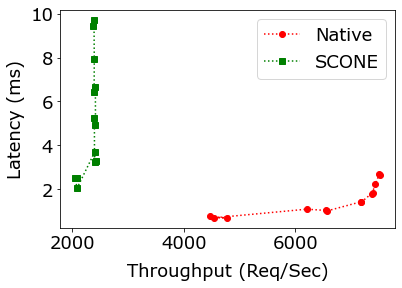

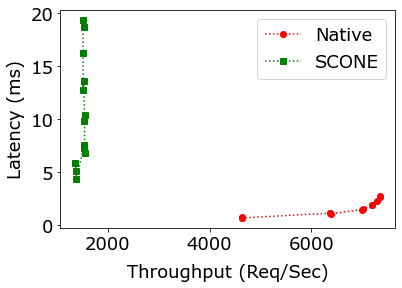

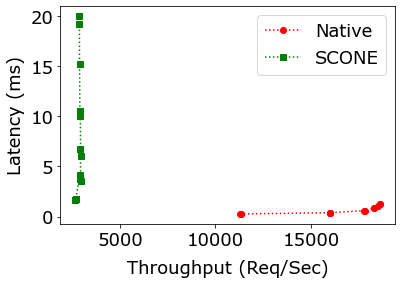

In [33]:
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
for i in range(len(run_type)): 
    df_list = pandas.read_csv(run_type[i]%"basic").astype(dtype=float)
    df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
    fig, ax = plt.subplots()
    df_list1 = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
    df_list_tc_request1 = df_list1.groupby(['threads', 'connections'],as_index=False).mean()
    df = pandas.merge(df_list_tc_request, df_list_tc_request1 ,  how='left', left_on=['threads','connections'], right_on = ['threads','connections'])
    fn = lambda row: row.lat_avg_y / row.lat_avg_x # define a function for the new column
    col = df.apply(fn, axis=1) # get column data with an index
    df = df.assign(overhead=col.values) # assign values to column 'c'
    for key, grp in df.groupby(['threads']):
        if int(key) != 3:
            continue
        ax = grp.plot(ax=ax, x='throughput_x', y='lat_avg_x', label="Native", linestyle=':', marker='o', color="red")
        ax = grp.plot(ax=ax, x='throughput_y', y='lat_avg_y', label="SCONE", linestyle=':', marker='s', color="green")
    plt.ylabel('Latency (ms)', labelpad=5)
    plt.xlabel('Throughput (Req/Sec)', labelpad=10)
    # plottext = graph_labels[i]
    # if i == 0 :
    #     plottext = graph_labels[i] + "(Batch of 100)"
    # plt.figtext(.5, -.12, plottext, ha='center')
    plt.savefig("images/Combined_" + graph_labels[i], bbox_inches='tight')


In [ ]:
dir_name = "../logfiles_consul_1st/csv/average/"
file_write_list = dir_name+"write-list-%s1.csv"
file_list_secrets = dir_name+"list-secrets-%s1.csv"
file_write_random_secrets = dir_name+"write-random-secrets-%s1.csv"
file_write_secrets = dir_name+"write-secrets-%s1.csv"
file_read_secrets = dir_name+"read-secrets-%s1.csv"

In [ ]:
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
for i in range(len(run_type)): 
    df_list_columns = pandas.read_csv(run_type[i]%"basic").astype(dtype=float)
    print(df_list_columns.columns)
    df_list = pandas.read_csv(run_type[i]%"basic").astype(dtype=float)
    # print(df_list)
    df_tmp = df_list['lat_avg'].skew()
    # print(df_tmp)
    # print( df_list['lat_avg'])
    # based on skewness values we can detect outliers
    print("describing %s" % graph_labels[i])
    print(df_list['lat_avg'].describe())
    # print(df_list['lat_avg'].quantile(0.10))
    # print(df_list['lat_avg'].quantile(0.90))
    # df_list["lat_avg"] = np.where(df_list["lat_avg"] <217.354, 217.354,df_list['lat_avg'])
    # df_list["lat_avg"] = np.where(df_list["lat_avg"] >801.414, 801.414,df_list['lat_avg'])
    # print(df_list['lat_avg'].unique())
    # print(df_list['lat_avg'].describe())
    # print(df_list['lat_avg'].skew())


In [ ]:
for i in range(len(run_type)): 
    df_list = pandas.read_csv(run_type[i]%"scone").astype(dtype=float)
    df_list = df_list[(df_list['run_time'] == 20)]
    # print(df_list)
    df_tmp = df_list['lat_avg'].skew()
    # print(df_tmp)
    # print( df_list['lat_avg'])
    # based on skewness values we can detect outliers
    print("describing %s" % graph_labels[i])
    print(df_list['lat_avg'].describe())
    # print(df_list['lat_avg'].quantile(0.10))
    # print(df_list['lat_avg'].quantile(0.90))
    # df_list["lat_avg"] = np.where(df_list["lat_avg"] <217.354, 217.354,df_list['lat_avg'])
    # df_list["lat_avg"] = np.where(df_list["lat_avg"] >801.414, 801.414,df_list['lat_avg'])
    # print(df_list['lat_avg'].unique())
    # print(df_list['lat_avg'].describe())
    # print(df_list['lat_avg'].skew())

In [ ]:
# run_times = [20,30,40,50]
# run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
# graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_type = [file_write_list]
graph_labels = ["Write List "]
run_times = [50]

for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        # print(df_list)
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='connections', y='50per', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('Total Requests', labelpad=5)
        plt.xlabel('Number Of Connections', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='connections', y='50per', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('Total Requests', labelpad=5)
        plt.xlabel('Number Of Connections', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul SCONE Mode)", ha='center')
        plt.show()


In [ ]:
# run_times = [20,30,40,50]
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_times = [20]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='90per', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('90Per', labelpad=5)
        plt.xlabel('Number Of Connections', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='90per', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2', y='lat_avg', label=str(int(key))+" Thread")
                plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
                ),
            ncol=3, fancybox=True)
        plt.ylabel('90Per', labelpad=5)
        plt.xlabel('Number Of Connections', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul SCONE Mode)", ha='center')
        plt.show()

In [ ]:
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
plt.rcParams.update({"font.weight":"medium", "font.style":"normal", "font.family":"Verdana", "font.size":18})
run_times = [20]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i]%"basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='lat_avg', label=str(int(key))+" Thread")
        plt.legend(loc='lower right', bbox_to_anchor=[0.5, 0.5],
            ncol=1)
        plt.ylabel('Latency(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        # plt.figtext(.5, -.13, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.savefig("images/" + graph_labels[i], bbox_inches='tight')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        fig, ax = plt.subplots()
        import matplotlib.font_manager as font_manager
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='lat_avg', label=str(int(key))+" Thread")
        plt.legend(loc='lower right', bbox_to_anchor=[0.5, 0.5],
            ncol=1)
        plt.ylabel('Latency(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        # plt.figtext(.5, -.13, graph_labels[i]+ "(Vault-Consul SCONE Mode)", ha='center')
        plt.savefig("images/SCONE " + graph_labels[i], bbox_inches='tight')
        plt.show()
        

In [ ]:
#working code
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
plt.rcParams.update({"font.weight":"medium", "font.style":"normal", "font.family":"Verdana", "font.size":18})
run_times = [20]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i]%"basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            if int(key) != 3:
                continue
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='lat_avg', label=str(int(key))+" Thread")
        plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.5),
            ncol=1)
        plt.ylabel('Latency (ms)', labelpad=5)
        plt.xlabel('Throughput (Req/Sec)', labelpad=10)
        # plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.savefig("images/" + graph_labels[i], bbox_inches='tight')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        fig, ax = plt.subplots()
        import matplotlib.font_manager as font_manager
        for key, grp in df_list_tc_request.groupby(['threads']):
            if int(key) != 3:
                continue
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='lat_avg', label=str(int(key))+" Thread")
        plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.5),
            ncol=1)
        plt.ylabel('Latency (ms)', labelpad=5)
        plt.xlabel('Throughput (Req/Sec)', labelpad=10)
        # plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul SCONE Mode)", ha='center')
        plt.savefig("images/SCONE " + graph_labels[i], bbox_inches='tight')
        plt.show()
        

In [ ]:
df_list_columns = pandas.read_csv(file_write_list % "scone").astype(dtype=float)
print(df_list_columns.columns)

In [ ]:
# run_times = [20,30,40,50]
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_times = [20]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='scatter', x='throughput', y='lat_max', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='scatter', x='throughput', y='lat_max', label=str(key)+" Thread", marker='o')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul SCONE Mode)", ha='center')
        plt.show()

In [ ]:
# run_times = [20,30,40,50]
# run_type = [file_write_list,file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
# graph_labels = ["Write List ","List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_type = [file_write_random_secrets]
graph_labels = ["Write Random Secrets "]
run_times = [50]
x_axis = ['50per','90per','99per','99.99per']
import numpy as np
from scipy import stats
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['50per','90per','99per','9999per']):
            ax = grp.plot(ax=ax, kind='scatter',x='throughput', y='lat_max' )
        # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
        #     ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.show()